In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [2]:
#Carga los dataset
li = []
for file in sorted(os.listdir("Dataset")):
    print('Reading file: ' + os.path.join("Dataset: ", file))
    df = pd.read_csv(os.path.join("Dataset", file))
    li.append(df)

TraficoTotal = pd.concat(li, axis=0, ignore_index=True)

Reading file: Dataset: /.DS_Store
Reading file: Dataset: /traffic012019.csv
Reading file: Dataset: /traffic022019.csv
Reading file: Dataset: /traffic032019.csv
Reading file: Dataset: /traffic042019.csv
Reading file: Dataset: /traffic052019.csv
Reading file: Dataset: /traffic062019.csv
Reading file: Dataset: /traffic072019.csv
Reading file: Dataset: /traffic082019.csv
Reading file: Dataset: /traffic092019.csv
Reading file: Dataset: /traffic102019.csv
Reading file: Dataset: /traffic112019.csv
Reading file: Dataset: /traffic122019.csv


/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
TraficoTotal.shape

(10040328, 11)

In [4]:
#Funcion que cambia el formato de las fechas 
def change_format(x):
    fec = str(x)
    ano=fec[0:4]
    mes=fec[4:6]
    dia=fec[6:8]
    tiempo=fec[8:14]
    final = ano + '/' + mes + '/' + dia + ' ' + tiempo[0:2] + ':' + tiempo[2:4] + ':' + tiempo[4:6] 
    return final 

In [5]:
#Aplicamos el cambio de formato a las fechas
TraficoTotal['DT_MEASURE_DATETIME'] = TraficoTotal['DT_MEASURE_DATETIME'].apply(change_format)
TraficoTotal['DT_MEASURE_DATETIME'] = pd.to_datetime(TraficoTotal['DT_MEASURE_DATETIME'])
TraficoTotal.head()


,DE_CUSTOMER_NAME,DE_INTERFACE,DT_MEASURE_DATETIME,DT_MEASURE_DATETIME_1,NU_SPEED,NU_TRAFFIC_INPUT,NU_TRAFFIC_OUTPUT,SC_INTERFACE_TYPE,SC_ROUTER,SD_ADMINISTRATIVE_NUMBER,Unnamed: 0
0,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:05:00,01/01/19,1.000000e+10,13305027.0,14886319.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
1,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:10:00,01/01/19,1.000000e+10,12808633.0,15743063.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
2,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:15:00,01/01/19,1.000000e+10,13086709.0,16867634.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
3,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:20:00,01/01/19,1.000000e+10,12158887.0,17587628.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
4,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:25:00,01/01/19,1.000000e+10,17157396.0,17422344.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN


In [6]:
#Vemos cuantos routers e interfaces contiene cada uno de los datos suministrados
print('Routers')
print(len(TraficoTotal.SC_ROUTER.unique()))
print(TraficoTotal.SC_ROUTER.unique())

print('Interfaces')
print(len(TraficoTotal.DE_INTERFACE.unique()))
print(TraficoTotal.DE_INTERFACE.unique())





Routers
6
['BBVA-ESP-TRC-MW-1-437644' 'BBVA-ESP-TRC-MW-2-437644'
 'BBVA-MEX-ATA-MW-1-1006634' 'BBVA-MEX-ATA-MW-2-1006634'
 'CMEX-MEX-OCCRTRDW01' 'CMEX-ESP-OCCRTRDW01']
Interfaces
78
['TenGigabitEthernet0/1/0.100' 'TenGigabitEthernet0/1/0.101'
 'TenGigabitEthernet0/1/0.102' 'TenGigabitEthernet0/1/0.104'
 'TenGigabitEthernet0/1/0.106' 'TenGigabitEthernet0/1/0.107' 'Tunnel5'
 'Tunnel59' 'Tunnel60' 'TenGigabitEthernet0/1/0'
 'TenGigabitEthernet0/1/0.103' 'TenGigabitEthernet0/1/0.109'
 'TenGigabitEthernet0/1/0.108' 'TenGigabitEthernet0/1/0.110'
 'TenGigabitEthernet0/1/0.111' 'TenGigabitEthernet0/1/0.112'
 'TenGigabitEthernet0/1/0.113' 'TenGigabitEthernet0/1/0.114'
 'TenGigabitEthernet0/1/0.115' 'TenGigabitEthernet0/1/0.116' 'Tunnel50'
 'Tunnel63' 'Tunnel64' 'Tunnel1' 'Tunnel65' 'Tunnel2' 'Tunnel3' 'Tunnel4'
 'Tunnel57' 'Tunnel58' 'Tunnel54' 'Tunnel55' 'Tunnel56' 'Tunnel61'
 'Tunnel62' 'GigabitEthernet0/0/0' 'GigabitEthernet0/0' 'Tunnel6'
 'TenGigabitEthernet0/1/0.120' 'Tunnel7' 'Tunnel8' 'T

In [7]:
#Para cada uno de los routers, vemos que interfaces contiene 
routers=TraficoTotal.SC_ROUTER.unique()
interfaces=TraficoTotal.DE_INTERFACE.unique()
for router in routers:
    rou = TraficoTotal.loc[TraficoTotal.SC_ROUTER == router]
    print('Router:  ' + router)
    print(rou.DE_INTERFACE.unique())

Router:  BBVA-ESP-TRC-MW-1-437644
['TenGigabitEthernet0/1/0.100' 'TenGigabitEthernet0/1/0.101'
 'TenGigabitEthernet0/1/0.102' 'TenGigabitEthernet0/1/0.104'
 'TenGigabitEthernet0/1/0.106' 'TenGigabitEthernet0/1/0.107'
 'TenGigabitEthernet0/1/0' 'TenGigabitEthernet0/1/0.110' 'Tunnel300'
 'Tunnel301' 'Tunnel307' 'Tunnel302' 'Tunnel303' 'Tunnel304' 'Tunnel305'
 'Tunnel306' 'TenGigabitEthernet0/1/0.123' 'Tunnel310'
 'TenGigabitEthernet0/1/0.124']
Router:  BBVA-ESP-TRC-MW-2-437644
['TenGigabitEthernet0/1/0.100' 'TenGigabitEthernet0/1/0.101'
 'TenGigabitEthernet0/1/0.102' 'TenGigabitEthernet0/1/0.104'
 'TenGigabitEthernet0/1/0.106' 'TenGigabitEthernet0/1/0.107'
 'TenGigabitEthernet0/1/0' 'Tunnel203' 'Tunnel204'
 'TenGigabitEthernet0/1/0.110' 'Tunnel200' 'Tunnel201' 'Tunnel202'
 'Tunnel205' 'Tunnel206' 'Tunnel207' 'Tunnel210' 'Tunnel211' 'Tunnel212'
 'Tunnel213' 'Tunnel307' 'Tunnel300' 'Tunnel301' 'Tunnel302' 'Tunnel303'
 'Tunnel304' 'Tunnel308' 'Tunnel305' 'Tunnel306'
 'TenGigabitEthernet0/1/

# CASO PARA ROUTERS QUE TRABAJAN DE MANERA PARALELA

In [8]:
#Caso routers en paralelo BBVA-ESP-TRC-MW 437644
tra1 =  TraficoTotal.loc[TraficoTotal.SC_ROUTER == 'BBVA-ESP-TRC-MW-1-437644']
tra2 =  TraficoTotal.loc[TraficoTotal.SC_ROUTER == 'BBVA-ESP-TRC-MW-2-437644']

In [9]:
#Filtramos su lista de interfaces
interfaceList=['TenGigabitEthernet0/1/0.100', 'TenGigabitEthernet0/1/0.101',
 'TenGigabitEthernet0/1/0.102' ,'TenGigabitEthernet0/1/0.104',
 'TenGigabitEthernet0/1/0.106' ,'TenGigabitEthernet0/1/0.107',
 'TenGigabitEthernet0/1/0' ,'TenGigabitEthernet0/1/0.110' ,'TenGigabitEthernet0/1/0.123',
 'TenGigabitEthernet0/1/0.124']
tra1 =  tra1.loc[tra1.DE_INTERFACE.isin(interfaceList)]
tra2 =  tra2.loc[tra2.DE_INTERFACE.isin(interfaceList)]



In [10]:
tra1 = tra1.sort_values(by=['DT_MEASURE_DATETIME'])
tra1.head(10)

,DE_CUSTOMER_NAME,DE_INTERFACE,DT_MEASURE_DATETIME,DT_MEASURE_DATETIME_1,NU_SPEED,NU_TRAFFIC_INPUT,NU_TRAFFIC_OUTPUT,SC_INTERFACE_TYPE,SC_ROUTER,SD_ADMINISTRATIVE_NUMBER,Unnamed: 0
0,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:05:00,01/01/19,1.000000e+10,13305027.0,14886319.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
26755,BBVA,TenGigabitEthernet0/1/0.104,2019-01-01 00:05:00,01/01/19,1.000000e+10,597.0,38.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
8918,BBVA,TenGigabitEthernet0/1/0.101,2019-01-01 00:05:00,01/01/19,1.000000e+10,598.0,40.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
35672,BBVA,TenGigabitEthernet0/1/0.106,2019-01-01 00:05:00,01/01/19,1.000000e+10,482884.0,19720.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
44590,BBVA,TenGigabitEthernet0/1/0.107,2019-01-01 00:05:00,01/01/19,5.000000e+09,165.0,835.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
17836,BBVA,TenGigabitEthernet0/1/0.102,2019-01-01 00:05:00,01/01/19,1.000000e+10,1158.0,715.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
1,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:10:00,01/01/19,1.000000e+10,12808633.0,15743063.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
26756,BBVA,TenGigabitEthernet0/1/0.104,2019-01-01 00:10:00,01/01/19,1.000000e+10,600.0,42.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
44591,BBVA,TenGigabitEthernet0/1/0.107,2019-01-01 00:10:00,01/01/19,5.000000e+09,176.0,824.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
35673,BBVA,TenGigabitEthernet0/1/0.106,2019-01-01 00:10:00,01/01/19,1.000000e+10,484813.0,19263.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN


In [11]:
tra2 = tra2.sort_values(by=['DT_MEASURE_DATETIME'])
tra2.head(10)

,DE_CUSTOMER_NAME,DE_INTERFACE,DT_MEASURE_DATETIME,DT_MEASURE_DATETIME_1,NU_SPEED,NU_TRAFFIC_INPUT,NU_TRAFFIC_OUTPUT,SC_INTERFACE_TYPE,SC_ROUTER,SD_ADMINISTRATIVE_NUMBER,Unnamed: 0
89156,BBVA,TenGigabitEthernet0/1/0.106,2019-01-01 00:05:00,01/01/19,1.000000e+10,5788.0,794.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
71332,BBVA,TenGigabitEthernet0/1/0.102,2019-01-01 00:05:00,01/01/19,1.000000e+10,1163.0,722.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
80245,BBVA,TenGigabitEthernet0/1/0.104,2019-01-01 00:05:00,01/01/19,1.000000e+10,601.0,43.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
98068,BBVA,TenGigabitEthernet0/1/0.107,2019-01-01 00:05:00,01/01/19,5.000000e+09,162.0,821.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
62420,BBVA,TenGigabitEthernet0/1/0.101,2019-01-01 00:05:00,01/01/19,1.000000e+10,602.0,42.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
53509,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:05:00,01/01/19,1.000000e+10,3823.0,26343.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
98069,BBVA,TenGigabitEthernet0/1/0.107,2019-01-01 00:10:00,01/01/19,5.000000e+09,204.0,835.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
89157,BBVA,TenGigabitEthernet0/1/0.106,2019-01-01 00:10:00,01/01/19,1.000000e+10,5797.0,798.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
71333,BBVA,TenGigabitEthernet0/1/0.102,2019-01-01 00:10:00,01/01/19,1.000000e+10,1160.0,724.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
62421,BBVA,TenGigabitEthernet0/1/0.101,2019-01-01 00:10:00,01/01/19,1.000000e+10,602.0,43.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN


In [12]:
#Para cada uno de los routers, vemos que interfaces contiene 
for interface in interfaceList:
    inter1 = tra1.loc[tra1.DE_INTERFACE == interface]
    inter2 = tra2.loc[tra2.DE_INTERFACE == interface]
    print('Interfaz:  ' + interface)
    print('Router 1: ' + str(inter1.shape[0]))
    print('Router 2: ' + str(inter2.shape[0]))

Interfaz:  TenGigabitEthernet0/1/0.100
Router 1: 78492
Router 2: 78379
Interfaz:  TenGigabitEthernet0/1/0.101
Router 1: 82153
Router 2: 78377
Interfaz:  TenGigabitEthernet0/1/0.102
Router 1: 87361
Router 2: 78379
Interfaz:  TenGigabitEthernet0/1/0.104
Router 1: 87361
Router 2: 78379
Interfaz:  TenGigabitEthernet0/1/0.106
Router 1: 78492
Router 2: 78379
Interfaz:  TenGigabitEthernet0/1/0.107
Router 1: 78493
Router 2: 78377
Interfaz:  TenGigabitEthernet0/1/0
Router 1: 59721
Router 2: 55518
Interfaz:  TenGigabitEthernet0/1/0.110
Router 1: 39201
Router 2: 39983
Interfaz:  TenGigabitEthernet0/1/0.123
Router 1: 33154
Router 2: 24295
Interfaz:  TenGigabitEthernet0/1/0.124
Router 1: 10542
Router 2: 3744


In [13]:
router1_inter1 = tra1.loc[tra1.DE_INTERFACE == 'TenGigabitEthernet0/1/0.101']
router2_inter1 = tra2.loc[tra2.DE_INTERFACE == 'TenGigabitEthernet0/1/0.101']
print(router1_inter1.shape[0])
router2_inter1.shape[0]

82153


78377

In [14]:
def fecha_incluida(df1, df2):
    fechas1_2 = [x for x in df1.DT_MEASURE_DATETIME.values if x not in df2.DT_MEASURE_DATETIME.values]
    fechas2_1 = [x for x in df2.DT_MEASURE_DATETIME.values if x not in df1.DT_MEASURE_DATETIME.values]
    return fechas1_2,fechas2_1

In [15]:
fechas1_2,fechas2_1 = fecha_incluida(router1_inter1, router2_inter1)
#print(fechas1_2)
#print(fechas2_1)

[numpy.datetime64('2019-01-05T08:25:00.000000000'), numpy.datetime64('2019-01-18T10:50:00.000000000'), numpy.datetime64('2019-01-18T10:55:00.000000000'), numpy.datetime64('2019-01-18T11:00:00.000000000'), numpy.datetime64('2019-01-18T11:05:00.000000000'), numpy.datetime64('2019-01-18T11:10:00.000000000'), numpy.datetime64('2019-02-04T23:10:00.000000000'), numpy.datetime64('2019-03-13T22:05:00.000000000'), numpy.datetime64('2019-03-25T19:50:00.000000000'), numpy.datetime64('2019-04-03T18:15:00.000000000'), numpy.datetime64('2019-04-08T21:25:00.000000000'), numpy.datetime64('2019-04-12T22:05:00.000000000'), numpy.datetime64('2019-04-17T20:00:00.000000000'), numpy.datetime64('2019-04-19T20:25:00.000000000'), numpy.datetime64('2019-04-24T19:40:00.000000000'), numpy.datetime64('2019-04-25T20:10:00.000000000'), numpy.datetime64('2019-04-29T21:00:00.000000000'), numpy.datetime64('2019-04-30T13:15:00.000000000'), numpy.datetime64('2019-05-03T02:15:00.000000000'), numpy.datetime64('2019-05-05T0

# Router con una interfaz

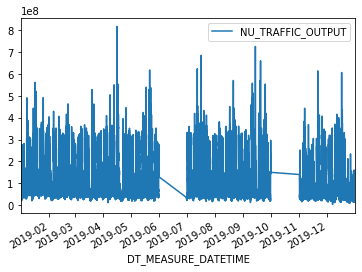

In [16]:
#Router de mexico lleva en funcionamiento 5 años, es el primero que utilizar 
traInter =  TraficoTotal.loc[TraficoTotal.SC_ROUTER == 'CMEX-MEX-OCCRTRDW01']
traInter=traInter.iloc[:,[2,6]]
traInter.set_index('DT_MEASURE_DATETIME', inplace = True) #Lo seteo como indice 
traInter.plot()


In [17]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

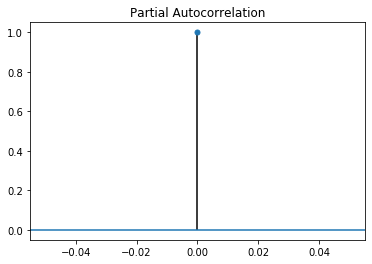

In [18]:
plot_pacf(traInter)
pyplot.show()

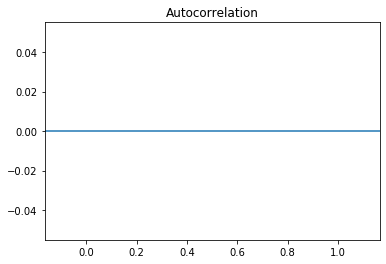

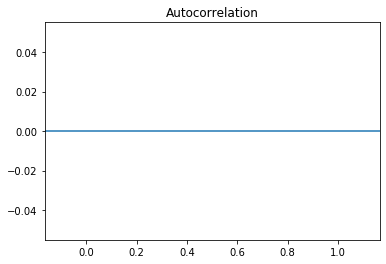

In [19]:
plot_acf(traInter,lags=250)
plot_acf(traInter)
pyplot.show()